In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Files
teams_path = 'Resources/MTeams.csv'
rankings_path = 'Resources/MMasseyOrdinals_thruDay128.csv'
results_path = 'Resources/MRegularSeasonCompactResults.csv'
sample_path = 'Resources/MSampleSubmissionStage2.csv'

In [3]:
# Teams raw DF
teams_df=pd.read_csv(teams_path)
print(teams_df.shape)
teams_df.head()

(372, 4)


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2022
1,1102,Air Force,1985,2022
2,1103,Akron,1985,2022
3,1104,Alabama,1985,2022
4,1105,Alabama A&M,2000,2022


In [4]:
# Rankings raw DF
rankings_df=pd.read_csv(rankings_path)
print(rankings_df.shape)
rankings_df.head()

(4601850, 5)


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [5]:
# Checking ranking systems
rankings_df['SystemName'].value_counts()

SAG    123479
MOR    122489
POM    119998
DOK    106702
WLK     98479
        ...  
HRN       351
CRW       351
PMC       351
BP5       345
PH        326
Name: SystemName, Length: 187, dtype: int64

In [6]:
# We need to get just SAG ranks for simplicity
SAG_ranks = rankings_df.loc[rankings_df['SystemName']=='SAG']
SAG_ranks.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
3622,2003,37,SAG,1102,114
3623,2003,37,SAG,1103,193
3624,2003,37,SAG,1104,11
3625,2003,37,SAG,1105,310
3626,2003,37,SAG,1106,257


In [7]:
# This is good for now - but we'll need to look up the OrdinalRank by TeamID and 
# load that into Results for the DayNum (results) corresponding to RankingDayNum

In [8]:
# Results raw DF
raw_results_df=pd.read_csv(results_path)
print(raw_results_df.shape)
raw_results_df.head()

(176080, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [9]:
# We want to drop years before 2003, because rankings go to 2003
results_df = raw_results_df[raw_results_df['Season']>=2003]
results_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
74048,2003,10,1104,68,1328,62,N,0
74049,2003,10,1272,70,1393,63,N,0
74050,2003,11,1266,73,1437,61,N,0
74051,2003,11,1296,56,1457,50,N,0
74052,2003,11,1400,77,1208,71,N,0


In [10]:
# Make a new column in SAG_Ranks called 'Season_Day_Team' that we will repeat in Results 

SAG_ranks['Season-Day-Team'] = SAG_ranks['Season'].map(str) + '-' + SAG_ranks['RankingDayNum'].map(str) + '-' + SAG_ranks['TeamID'].map(str)
SAG_ranks.head()

/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,Season-Day-Team
3622,2003,37,SAG,1102,114,2003-37-1102
3623,2003,37,SAG,1103,193,2003-37-1103
3624,2003,37,SAG,1104,11,2003-37-1104
3625,2003,37,SAG,1105,310,2003-37-1105
3626,2003,37,SAG,1106,257,2003-37-1106


In [11]:
# Make new columns in SAG_Ranks called 'RankingWeek' and 'Season_Week_Team' because rankings only come out weekly

SAG_ranks['RankingWeek'] = (SAG_ranks['RankingDayNum']/7).round(decimals=0)

SAG_ranks['Season-Week-Team'] = SAG_ranks['Season'].map(str) + '-' + SAG_ranks['RankingWeek'].map(str) + '-' + SAG_ranks['TeamID'].map(str)
SAG_ranks.head()

/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,Season-Day-Team,RankingWeek,Season-Week-Team
3622,2003,37,SAG,1102,114,2003-37-1102,5.0,2003-5.0-1102
3623,2003,37,SAG,1103,193,2003-37-1103,5.0,2003-5.0-1103
3624,2003,37,SAG,1104,11,2003-37-1104,5.0,2003-5.0-1104
3625,2003,37,SAG,1105,310,2003-37-1105,5.0,2003-5.0-1105
3626,2003,37,SAG,1106,257,2003-37-1106,5.0,2003-5.0-1106


In [12]:
# Make a new column in Results called 'WSeason_Day_Team' & 'LSeason_Day_Team' that we'll use for potential indices

results_df['WSeason-Day-Team'] = results_df['Season'].map(str) + '-' + results_df['DayNum'].map(str) + '-' + results_df['WTeamID'].map(str)
results_df['LSeason-Day-Team'] = results_df['Season'].map(str) + '-' + results_df['DayNum'].map(str) + '-' + results_df['LTeamID'].map(str)
results_df.head()

/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team
74048,2003,10,1104,68,1328,62,N,0,2003-10-1104,2003-10-1328
74049,2003,10,1272,70,1393,63,N,0,2003-10-1272,2003-10-1393
74050,2003,11,1266,73,1437,61,N,0,2003-11-1266,2003-11-1437
74051,2003,11,1296,56,1457,50,N,0,2003-11-1296,2003-11-1457
74052,2003,11,1400,77,1208,71,N,0,2003-11-1400,2003-11-1208


In [13]:
# Make a new column in Results called 'WSeason_Week_Team' & 'LSeason_Week_Team' that we'll use for loc to pull in OrdinalRank for winning and losing team

results_df['WeekNum'] = (results_df['DayNum']/7).round(decimals=0)

results_df['WSeason-Week-Team'] = results_df['Season'].map(str) + '-' + results_df['WeekNum'].map(str) + '-' + results_df['WTeamID'].map(str)
results_df['LSeason-Week-Team'] = results_df['Season'].map(str) + '-' + results_df['WeekNum'].map(str) + '-' + results_df['LTeamID'].map(str)
results_df.head()

/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team
74048,2003,10,1104,68,1328,62,N,0,2003-10-1104,2003-10-1328,1.0,2003-1.0-1104,2003-1.0-1328
74049,2003,10,1272,70,1393,63,N,0,2003-10-1272,2003-10-1393,1.0,2003-1.0-1272,2003-1.0-1393
74050,2003,11,1266,73,1437,61,N,0,2003-11-1266,2003-11-1437,2.0,2003-2.0-1266,2003-2.0-1437
74051,2003,11,1296,56,1457,50,N,0,2003-11-1296,2003-11-1457,2.0,2003-2.0-1296,2003-2.0-1457
74052,2003,11,1400,77,1208,71,N,0,2003-11-1400,2003-11-1208,2.0,2003-2.0-1400,2003-2.0-1208


In [14]:
# Get winning and losing team rank for that day in our results df

# # Create empty columns
# results_df['WRank'] = "" 
# results_df['LRank'] = ""
# results_df.head()

In [15]:
# Merging winning team rankings on season-week-team. There will be NA's for Rank bc of beginning and end of season

results_df = results_df.merge(SAG_ranks[['Season-Week-Team','OrdinalRank']], how='left', left_on='WSeason-Week-Team', right_on='Season-Week-Team').drop(columns=['Season-Week-Team'])

results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,OrdinalRank
38555,2010,110,1346,87,1352,79,A,0,2010-110-1346,2010-110-1352,16.0,2010-16.0-1346,2010-16.0-1352,191.0
90796,2020,75,1214,88,1421,86,A,0,2020-75-1214,2020-75-1421,11.0,2020-11.0-1214,2020-11.0-1421,296.0
92609,2020,114,1202,81,1422,67,A,0,2020-114-1202,2020-114-1422,16.0,2020-16.0-1202,2020-16.0-1422,77.0
32950,2009,103,1357,72,1384,57,A,0,2009-103-1357,2009-103-1384,15.0,2009-15.0-1357,2009-15.0-1384,237.0
76355,2017,115,1431,60,1194,55,A,0,2017-115-1431,2017-115-1194,16.0,2017-16.0-1431,2017-16.0-1194,220.0
40744,2011,40,1242,76,1161,55,N,0,2011-40-1242,2011-40-1161,6.0,2011-6.0-1242,2011-6.0-1161,6.0
42371,2011,82,1123,70,1405,60,A,0,2011-82-1123,2011-82-1405,12.0,2011-12.0-1123,2011-12.0-1405,114.0
82102,2018,123,1229,77,1232,70,N,0,2018-123-1229,2018-123-1232,18.0,2018-18.0-1229,2018-18.0-1232,135.0
75915,2017,106,1328,70,1400,66,H,0,2017-106-1328,2017-106-1400,15.0,2017-15.0-1328,2017-15.0-1400,67.0
60085,2014,111,1195,78,1244,68,H,0,2014-111-1195,2014-111-1244,16.0,2014-16.0-1195,2014-16.0-1244,176.0


In [16]:
# Rename OrdinalRank to WRank
results_df.rename(columns={'OrdinalRank': 'WRank'},inplace=True)
results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank
35589,2010,44,1210,65,1115,53,H,0,2010-44-1210,2010-44-1115,6.0,2010-6.0-1210,2010-6.0-1115,32.0
26506,2008,75,1398,79,1183,72,H,0,2008-75-1398,2008-75-1183,11.0,2008-11.0-1398,2008-11.0-1183,256.0
87321,2019,117,1288,76,1175,58,A,0,2019-117-1288,2019-117-1175,17.0,2019-17.0-1288,2019-17.0-1175,332.0
3226,2003,96,1437,72,1274,67,A,1,2003-96-1437,2003-96-1274,14.0,2003-14.0-1437,2003-14.0-1274,51.0
80270,2018,83,1107,83,1420,39,H,0,2018-83-1107,2018-83-1420,12.0,2018-12.0-1107,2018-12.0-1420,129.0
3021,2003,93,1329,63,1243,55,H,0,2003-93-1329,2003-93-1243,13.0,2003-13.0-1329,2003-13.0-1243,13.0
37226,2010,82,1366,68,1255,66,H,0,2010-82-1366,2010-82-1255,12.0,2010-12.0-1366,2010-12.0-1255,301.0
21988,2007,91,1259,72,1373,71,H,0,2007-91-1259,2007-91-1373,13.0,2007-13.0-1259,2007-13.0-1373,185.0
13632,2005,124,1341,49,1380,47,H,0,2005-124-1341,2005-124-1380,18.0,2005-18.0-1341,2005-18.0-1380,327.0
37965,2010,98,1238,63,1380,53,H,0,2010-98-1238,2010-98-1380,14.0,2010-14.0-1238,2010-14.0-1380,290.0


In [17]:
# Merging losing team rankings on season-week-team. There will be NA's for Rank bc of beginning and end of season

results_df = results_df.merge(SAG_ranks[['Season-Week-Team','OrdinalRank']], how='left', left_on='LSeason-Week-Team', right_on='Season-Week-Team').drop(columns=['Season-Week-Team'])

results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,OrdinalRank
86420,2019,80,1352,72,1357,64,H,0,2019-80-1352,2019-80-1357,11.0,2019-11.0-1352,2019-11.0-1357,277.0,274.0
78740,2018,27,1160,81,1102,69,H,0,2018-27-1160,2018-27-1102,4.0,2018-4.0-1160,2018-4.0-1102,75.0,223.0
935,2003,40,1439,71,1288,64,H,0,2003-40-1439,2003-40-1288,6.0,2003-6.0-1439,2003-6.0-1288,185.0,327.0
61843,2015,11,1434,90,1190,76,H,0,2015-11-1434,2015-11-1190,2.0,2015-2.0-1434,2015-2.0-1190,168.0,212.0
102798,2022,121,1155,68,1210,65,H,0,2022-121-1155,2022-121-1210,17.0,2022-17.0-1155,2022-17.0-1210,77.0,125.0
61799,2015,11,1277,64,1298,59,A,0,2015-11-1277,2015-11-1298,2.0,2015-2.0-1277,2015-2.0-1298,5.0,323.0
72644,2017,14,1140,82,1343,73,H,0,2017-14-1140,2017-14-1343,2.0,2017-2.0-1140,2017-2.0-1343,49.0,79.0
11592,2005,79,1348,76,1182,69,A,0,2005-79-1348,2005-79-1182,11.0,2005-11.0-1348,2005-11.0-1182,249.0,277.0
10258,2005,44,1444,75,1237,66,A,0,2005-44-1444,2005-44-1237,6.0,2005-6.0-1444,2005-6.0-1237,84.0,107.0
97062,2021,110,1209,65,1407,53,H,0,2021-110-1209,2021-110-1407,16.0,2021-16.0-1209,2021-16.0-1407,144.0,291.0


In [18]:
# Rename OrdinalRank to LRank
results_df.rename(columns={'OrdinalRank': 'LRank'},inplace=True)
results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,LRank
73882,2017,40,1238,68,1179,63,A,0,2017-40-1238,2017-40-1179,6.0,2017-6.0-1238,2017-6.0-1179,307.0,304.0
62621,2015,27,1143,64,1201,57,A,0,2015-27-1143,2015-27-1201,4.0,2015-4.0-1143,2015-4.0-1201,31.0,248.0
100336,2022,73,1292,70,1194,57,H,0,2022-73-1292,2022-73-1194,10.0,2022-10.0-1292,2022-10.0-1194,181.0,193.0
102430,2022,114,1155,80,1448,69,H,0,2022-114-1155,2022-114-1448,16.0,2022-16.0-1155,2022-16.0-1448,82.0,41.0
83243,2018,131,1217,74,1165,55,N,0,2018-131-1217,2018-131-1165,19.0,2018-19.0-1217,2018-19.0-1165,127.0,251.0
74350,2017,52,1236,93,1178,86,A,0,2017-52-1236,2017-52-1178,7.0,2017-7.0-1236,2017-7.0-1178,85.0,299.0
5909,2004,55,1102,49,1143,44,A,0,2004-55-1102,2004-55-1143,8.0,2004-8.0-1102,2004-8.0-1143,91.0,98.0
34158,2009,129,1246,71,1279,58,N,0,2009-129-1246,2009-129-1279,18.0,2009-18.0-1246,2009-18.0-1279,60.0,86.0
59442,2014,80,1409,58,1292,53,H,0,2014-80-1409,2014-80-1292,11.0,2014-11.0-1409,2014-11.0-1292,125.0,142.0
74730,2017,64,1405,86,1138,54,H,0,2017-64-1405,2017-64-1138,9.0,2017-9.0-1405,2017-9.0-1138,140.0,152.0


In [41]:
# Getting ranking differential to use as a variable - negative values are underdog wins
results_df['RankDiff'] = results_df['WRank'] - results_df['LRank']
results_df['RankDiff'] = results_df['RankDiff'].abs()

# Getting Score differential just in case
results_df['Spread'] = results_df['WScore'] - results_df['LScore']

# Outcome column for if high rank team (favorite) won
results_df['FavWin'] = np.where((results_df['WRank'] < results_df['LRank']), 1, 0)

results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,LRank,RankDiff,Spread,FavWin
78594,2018,25,1139,71,1340,69,N,0,2018-25-1139,2018-25-1340,4.0,2018-4.0-1139,2018-4.0-1340,60.0,177.0,117.0,2,1
9548,2005,25,1174,71,1291,49,H,0,2005-25-1174,2005-25-1291,4.0,2005-4.0-1174,2005-4.0-1291,202.0,319.0,117.0,22,1
47494,2012,50,1301,67,1382,65,N,0,2012-50-1301,2012-50-1382,7.0,2012-7.0-1301,2012-7.0-1382,78.0,93.0,15.0,2,1
98962,2022,29,1222,99,1322,58,H,0,2022-29-1222,2022-29-1322,4.0,2022-4.0-1222,2022-4.0-1322,7.0,340.0,333.0,41,1
19543,2007,27,1156,59,1174,53,A,0,2007-27-1156,2007-27-1174,4.0,2007-4.0-1156,2007-4.0-1174,NaN,NaN,NaN,6,0
99865,2022,59,1353,80,1263,64,H,0,2022-59-1353,2022-59-1263,8.0,2022-8.0-1353,2022-8.0-1263,95.0,352.0,257.0,16,1
30914,2009,57,1335,78,1144,67,N,0,2009-57-1335,2009-57-1144,8.0,2009-8.0-1335,2009-8.0-1144,280.0,277.0,3.0,11,0
12760,2005,103,1463,54,1217,53,H,0,2005-103-1463,2005-103-1217,15.0,2005-15.0-1463,2005-15.0-1217,227.0,215.0,12.0,1,0
10854,2005,62,1346,102,1255,93,H,2,2005-62-1346,2005-62-1255,9.0,2005-9.0-1346,2005-9.0-1255,241.0,326.0,85.0,9,1
14586,2006,29,1159,65,1171,64,H,2,2006-29-1159,2006-29-1171,4.0,2006-4.0-1159,2006-4.0-1171,279.0,241.0,38.0,1,0


In [42]:
# Drop NA's for a nice and pretty DF

clean_results_df = results_df.dropna()

clean_results_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,LRank,RankDiff,Spread,FavWin
632,2003,32,1110,73,1347,49,H,0,2003-32-1110,2003-32-1347,5.0,2003-5.0-1110,2003-5.0-1347,204.0,300.0,96.0,24,1
633,2003,32,1127,74,1176,69,N,0,2003-32-1127,2003-32-1176,5.0,2003-5.0-1127,2003-5.0-1176,225.0,212.0,13.0,5,0
634,2003,32,1156,81,1271,61,H,0,2003-32-1156,2003-32-1271,5.0,2003-5.0-1156,2003-5.0-1271,189.0,318.0,129.0,20,1
635,2003,32,1159,87,1306,68,H,0,2003-32-1159,2003-32-1306,5.0,2003-5.0-1159,2003-5.0-1306,289.0,316.0,27.0,19,1
636,2003,32,1162,58,1119,44,H,0,2003-32-1162,2003-32-1119,5.0,2003-5.0-1162,2003-5.0-1119,321.0,323.0,2.0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103178,2022,129,1435,82,1104,76,N,0,2022-129-1435,2022-129-1104,18.0,2022-18.0-1435,2022-18.0-1104,77.0,23.0,54.0,6,0
103179,2022,129,1437,66,1385,65,N,0,2022-129-1437,2022-129-1385,18.0,2022-18.0-1437,2022-18.0-1385,10.0,53.0,43.0,1,1
103180,2022,129,1439,87,1323,80,N,0,2022-129-1439,2022-129-1323,18.0,2022-18.0-1439,2022-18.0-1323,36.0,49.0,13.0,7,1
103181,2022,129,1451,68,1285,56,N,0,2022-129-1451,2022-129-1285,18.0,2022-18.0-1451,2022-18.0-1285,171.0,226.0,55.0,12,1


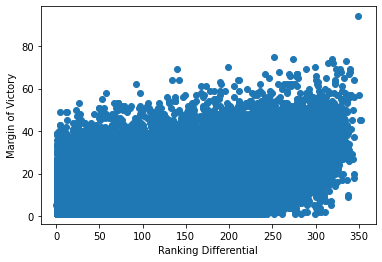

In [43]:
# Look at rank diff and spread

plt.scatter(clean_results_df['RankDiff'],clean_results_df['Spread'])
plt.xlabel('Ranking Differential')
plt.ylabel('Margin of Victory')
plt.show()

In [44]:
# X = ranks, y = win?

y = clean_results_df['FavWin']
X = clean_results_df[['RankDiff','Spread']]

In [45]:
# Do TTS 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(75510, 2)

In [46]:
# Train
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [47]:
y_pred = classifier.predict(X_test)
predictions = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
predictions.head(20)

,Prediction,Actual
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,1,0
9,1,1


In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7496722418656391
